# **ANALYZING GLOBAL LABOR MIGRATION AND TRADE PATTERNS**

### **SECTION 1: INSTALLING ALL THE NECESSARY MODULES AND IMPORTING PACKAGES**

In [8]:
!pip install pandas

In [9]:
!pip install plotly

In [10]:
!pip install geopy pycountry

In [11]:
!pip install dash

In [12]:
!pip install geopandas

In [13]:
!pip install basemap

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
import plotly.express as px
import pycountry
import plotly.graph_objects as go
import pycountry
from geopy.geocoders import Nominatim
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import geopandas as gpd
from shapely.geometry import Point, LineString
from mpl_toolkits.basemap import Basemap

### **SECTION 2: IMPORTING THE DATA SETS**

In [16]:
trade_flows = pd.read_excel('final_gravity.xlsx')
labor_agreements = pd.read_csv('BLAs_data.csv')
trade_agreements = pd.read_excel('AgreementsList.xlsx')
bil_remittance = pd.read_csv('remittance2021.csv')

In [17]:
#Bilateral remittance data as of 2022 using migrant stocks from KNOMAD (measured in million of US$)
bil_remittance.columns = bil_remittance.iloc[0]
bil_remittance = bil_remittance.iloc[:, :-2]
bil_remittance = bil_remittance[1:215]
bil_remittance=bil_remittance.reset_index(drop=True)
bil_remittance.head()

0 Remittance-receiving country (across)                                                              -                                                 Remittance-sending country (down)   \
0                                        Afghanistan                                                                                                                                        
1                                            Albania                                                                                                                                        
2                                            Algeria                                                                                                                                        
3                                     American Samoa                                                                                                                                        
4                                            Andorra                                                                                                                                        

0 Afghanistan Albania Algeria American Samoa Andorra Angola  \
0         NaN     NaN     NaN            NaN     NaN    NaN   
1         NaN     NaN     NaN            NaN     NaN    NaN   
2         NaN     NaN     NaN            NaN     NaN    NaN   
3         NaN     NaN     NaN            NaN     NaN    NaN   
4         NaN     NaN     NaN            NaN     NaN    NaN   

0 Antigua and Barbuda Argentina Armenia  ... Uruguay Uzbekistan Vanuatu  \
0                 NaN       NaN     NaN  ...     NaN        NaN     NaN   
1                 NaN       NaN     NaN  ...     NaN        NaN     NaN   
2                 NaN       NaN     NaN  ...     NaN        NaN     NaN   
3                 NaN       NaN     NaN  ...     NaN        NaN     NaN   
4                 NaN         1     NaN  ...       0        NaN     NaN   

0 Venezuela, RB Vietnam Virgin Islands (U.S.) West Bank and Gaza Yemen, Rep.  \
0           NaN     NaN                   NaN                NaN         NaN   
1           NaN     NaN                   NaN                NaN         NaN   
2           NaN     NaN                   NaN                 26         NaN   
3           NaN       1                   NaN                NaN         NaN   
4           NaN     NaN                   NaN                NaN         NaN   

0 Zambia Zimbabwe  
0    NaN      NaN  
1    NaN      NaN  
2    NaN      NaN  
3    NaN      NaN  
4    NaN      NaN  

[5 rows x 215 columns]

In [18]:
#Bilateral trade between countries in 2019 from CEPII database
trade_flows.head()

year origin destination  distance  contigous  social connectedness  \
0  2019    ABW         AGO      9572          0                1344.0   
1  2019    ABW         AIA       978          0                   NaN   
2  2019    ABW         ARE     12772          0                3998.0   
3  2019    ABW         ATG      1016          0              165086.0   
4  2019    ABW         AUT      8716          0                3596.0   

   common language  common legal  common religion  gdp of origin  \
0              0.0           1.0          0.60666    3310055.866   
1              1.0           0.0              NaN    3310055.866   
2              0.0           0.0          0.00368    3310055.866   
3              1.0           0.0          0.12148    3310055.866   
4              0.0           0.0          0.76888    3310055.866   

   gdp of destination  trade_value  rta  
0        6.930910e+07    10.044000    0  
1                 NaN     5.088000    0  
2        4.172156e+08   889.711975    0  
3        1.687533e+06     2.045000    0  
4        4.450119e+08   174.145004    0

In [19]:
#Bilateral labor migration agreements dataset from Harvard dataverse as of 2022
labor_agreements=labor_agreements.sort_values(by="year", ascending=True)

In [20]:
labor_agreements.head()

treatyID countryA        countryB  codeA  codeB  dyadID  year  \
878       927  Germany          Poland    255    290    8763  1927   
884       933  Germany  Czechoslovakia    255    315    8766  1928   
236       245  Belgium           Italy    211    325    7311  1946   
277       294   France     Switzerland    220    225    7629  1946   
278       295   France     Switzerland    220    225    7629  1946   

     datesigned    ratified  copy_available  ...  evidence_notavailable  \
878    11/24/27         NaN               1  ...                    0.0   
884   5/11/1928   5/11/1928               1  ...                    0.0   
236   6/23/1946   6/23/1946               1  ...                    0.0   
277    8/1/1946    8/1/1946               1  ...                    0.0   
278    8/1/1946    8/1/1946               1  ...                    0.0   

     dataset_original copy_english  copy_french  copy_german  copy_spanish  \
878               NaN            0            0            1             0   
884               NaN            1            0            0             0   
236        CPW (2017)            1            0            0             0   
277        CPW (2017)            0            1            0             0   
278        CPW (2017)            0            1            0             0   

     copy_arabic  copy_polish  copy_russian  copy_portugese  
878            0            1             0               0  
884            0            0             0               0  
236            0            0             0               0  
277            0            0             0               0  
278            0            0             0               0  

[5 rows x 21 columns]

In [21]:
#Preferential Trade Agreements from WTO
trade_agreements.head()

RTA Name          Coverage       Type  \
0                   EU - Kenya             Goods        FTA   
1  EFTA - Moldova, Republic of  Goods & Services  FTA & EIA   
2               China - Serbia             Goods        FTA   
3              China - Ecuador             Goods        FTA   
4             Canada - Ukraine  Goods & Services  FTA & EIA   

  Date of notification                  Notification Date of entry into force  \
0  2024-08-29 00:00:00                GATT Art. XXIV      2024-07-01 00:00:00   
1  2024-08-29 00:00:00  GATT Art. XXIV & GATS Art. V      2024-09-01 00:00:00   
2  2024-08-19 00:00:00                GATT Art. XXIV      2024-07-01 00:00:00   
3  2024-08-12 00:00:00                GATT Art. XXIV      2024-05-01 00:00:00   
4  2024-07-12 00:00:00  GATT Art. XXIV & GATS Art. V      2024-07-01 00:00:00   

                            Status  \
0                         In Force   
1  In force for at least one Party   
2                         In Force   
3                         In Force   
4                         In Force   

                                         Signatories  \
0  Kenya; Austria;Belgium;Bulgaria;Croatia;Cyprus...   
1  Moldova, Republic of; Iceland;Liechtenstein;No...   
2                                      China; Serbia   
3                                     China; Ecuador   
4                                    Canada; Ukraine   

                                             Remarks  
0                                                NaN  
1  Entry into force between the Republic of Moldo...  
2                                                NaN  
3                                                NaN  
4  The modernized Canada-Ukraine Free Trade Agree...

## **SECTION 3: HOW HAVE LABOR AGREEMENTS EVOLVED OVER TIME?

***This section shows, through an interactive map, the evolution of bilateral trade agreements over time. In the 1950s, we see European countries starting to sign labor agreements with South American countries. African countries start to come into the picture in the 1970s and the agreements arre mostly with their European counterparts. Meanwhile, Australia is one of the countries with the highest agreements, mostly with Asian countries in the Pacific Ocean and European countries. On the other side of the globe, the US and Canada did not have as many agreements as its European peers, with the bulk of US agreements being with Mexico alone.***

In [24]:
#Importing country coordinates dataset
country_coordinates = pd.read_csv('country coordinates.csv')
country_coordinates.drop(['country_code', 'usa_state_code', 'usa_state_latitude','usa_state_longitude','usa_state'], axis=1, inplace=True)

#It was possible to use existing coordinates packages in python but it was taking too long to run

In [35]:
# Initialize geolocator
geolocator = Nominatim(user_agent="geoapi")

# Function to fetch coordinates or use existing ones if available
def get_country_coordinates(country_name, country_coordinates):
    # Check if coordinates for the country already exist in the dataframe
    if country_name in country_coordinates['country'].values:
        coords = country_coordinates[country_coordinates['country'] == country_name].iloc[0]
        return coords['latitude'], coords['longitude']
    else:
        # If not, fetch using geolocator
        try:
            location = geolocator.geocode(country_name, timeout=15)
            if location:
                return location.latitude, location.longitude
        except GeocoderTimedOut:
            return None, None

# Assuming `existing_coords_df` is your dataframe with the country coordinates
# Fetch coordinates for both Country_A and Country_B
labor_agreements["Country_A_Coords"] = labor_agreements["countryA"].apply(get_country_coordinates, country_coordinates=country_coordinates)
labor_agreements["Country_B_Coords"] = labor_agreements["countryB"].apply(get_country_coordinates, country_coordinates=country_coordinates)

# Extract latitudes and longitudes into separate columns
labor_agreements["Lat_A"], labor_agreements["Lon_A"] = zip(*labor_agreements["Country_A_Coords"])
labor_agreements["Lat_B"], labor_agreements["Lon_B"] = zip(*labor_agreements["Country_B_Coords"])

#### **VISUALIZATION OF BILATERAL LABOR AGREEMENTS**

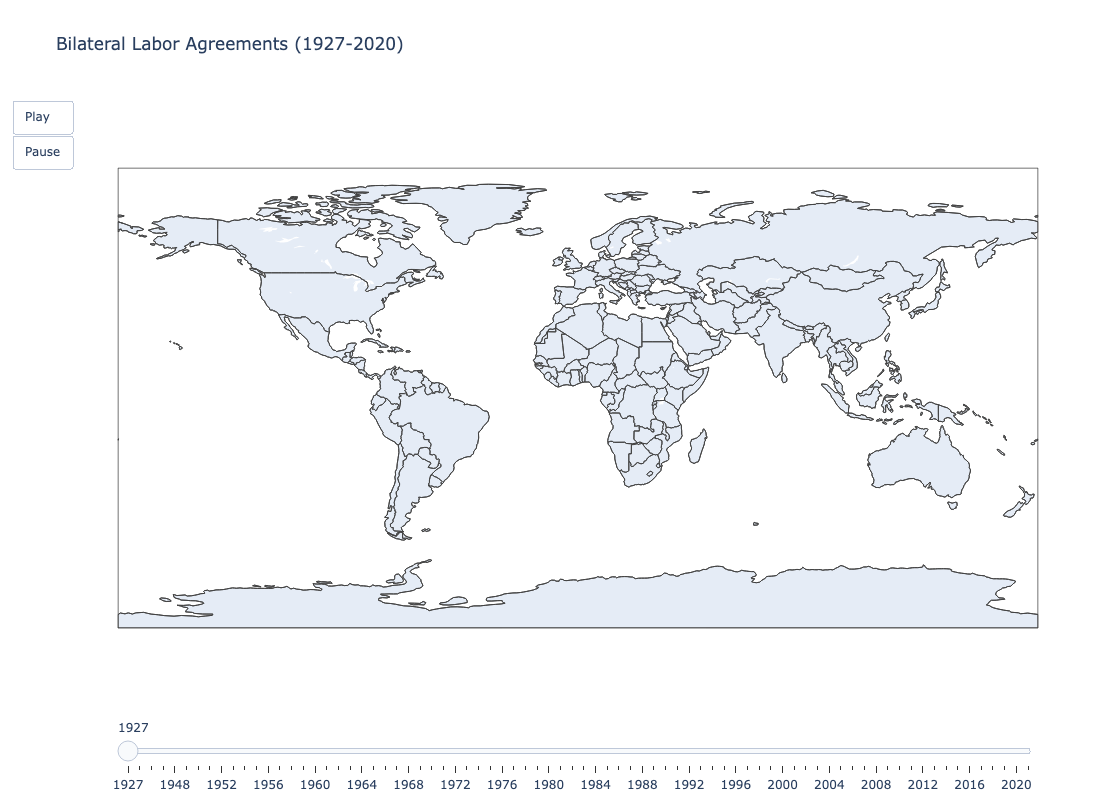

In [37]:
#STEP 1: Importing a map of the globe using Plotly
fig = go.Figure(go.Scattergeo())

fig.update_layout(
    geo=dict(
        showcoastlines=True,          # Show coastlines
        showland=True,                # Show land areas
        landcolor="lightgray",       # Set the land color
        showlakes=True,               # Show lakes
        lakecolor="cornflowerblue",             # Set the lake color
        showcountries=True,           # Show country borders
        countrycolor="black",         # Color for country borders
        projection_type="equirectangular",  # Flat map projection
        resolution=110                # High resolution for country borders
    ),
    width=1100,                       # Set the width of the figure
    height=650                        # Set the height of the figure
)
# Create the map
fig = go.Figure()

# Add traces for each year (initially hidden)
for year in labor_agreements["year"].unique():
    df_year = labor_agreements[labor_agreements["year"] == year]
    year_traces = []
    
    for i, row in df_year.iterrows():
        lat_a, lon_a = row["Lat_A"], row["Lon_A"]
        lat_b, lon_b = row["Lat_B"], row["Lon_B"]

        if lat_a and lon_a and lat_b and lon_b:  # Ensure valid coordinates
            year_traces.append(
                go.Scattergeo(
                    lon=[lon_a, lon_b],
                    lat=[lat_a, lat_b],
                    mode="lines+markers",
                    line=dict(width=2, color="cornflowerblue"),
                    marker=dict(size=5, color="chocolate"),
                    name=f"{row['countryA']} ↔ {row['countryB']} ({row['year']})",
                    visible=False  # Initially set to invisible
                )
            )

    # Add each year’s traces as a frame
    for trace in year_traces:
        fig.add_trace(trace)

# Create animation frames
frames = []
for year in labor_agreements["year"].unique():
    year_traces = [
          go.Scattergeo(
            lon=[row["Lon_A"], row["Lon_B"]],
            lat=[row["Lat_A"], row["Lat_B"]],
            mode="lines+markers",
            line=dict(width=2, color="cornflowerblue"),
            marker=dict(size=5, color="chocolate"),
            name=f"{row['countryA']} ↔ {row['countryB']} ({year})",
            visible=True  # Set to visible for the current frame
        ) for i, row in labor_agreements[labor_agreements["year"] == year].iterrows()
    ]
    frames.append(go.Frame(data=year_traces, name=str(year)))
      
# Add frames to the figure
fig.frames = frames

# Update layout with animation controls
fig.update_layout(
    geo=dict(
        showcoastlines=True,
        showcountries=True,
        projection_type="equirectangular",
    ),
    title="Bilateral Labor Agreements (1927-2020)",
    width=1200,
    height=800,
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'buttons': [
            {
                'label': 'Play',
                'method': 'animate',
                'args': [None, {'frame': {'duration': 1000, 'redraw': True}, 'fromcurrent': True}],
            },
            {
                'label': 'Pause',
                'method': 'animate',
                'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate'}],
            },
        ],
    }],
    sliders=[{
        'steps': [{
            'args': [
                [str(year)], 
                {'frame': {'duration': 1000, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 300}}
            ],
            'label': str(year),
            'method': 'animate',
        } for year in labor_agreements["year"].unique()]
    }]
)

fig.show()


#### **A COUNTRY-FILTERED VIEW**

*This version of the interactive map allows one to filter out a country to have a more in-depth visualization. The above filter shows France which has signed the most labor agreements (181). With this visualization and the legend on the right-hand side, it is easy to see how France's labor agreements evolved over time, from its European counterparts in the 1940s-1950s to its former colonies in West Africa in the 1970s-2000s, and beyond.
With this tool, it is also possible to visualize the emergence of the Gulf and South Asia countries in the global labor migration dynamics.*

In [39]:
# Initialize Dash app
app = Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Interactive Map with Country Filter"),
    html.Div(id="agreement-count", style={"fontSize": "20px", "marginBottom": "10px"}),
    dcc.Dropdown(
        id="country-filter",
        options=[
            {"label": country, "value": country}
            for country in pd.concat([labor_agreements["countryA"], labor_agreements["countryB"]]).unique()
        ],
        placeholder="Select a country"
    ),
    dcc.Graph(id="map")
])

# Callback to update the map and display the agreement count
@app.callback(
    [Output("map", "figure"), Output("agreement-count", "children")],
    [Input("country-filter", "value")]
)
def update_map(selected_country):
    # Filter data based on selected country
    if selected_country:
        filtered_data = labor_agreements[
            (labor_agreements["countryA"] == selected_country) |
            (labor_agreements["countryB"] == selected_country)
        ]
        total_agreements = len(filtered_data)
        agreement_count_text = f"Total Agreements Signed by {selected_country}: {total_agreements}"
    else:
        filtered_data = labor_agreements
        agreement_count_text = "Select a country to see the total number of agreements."

    # Create the map
    fig = go.Figure()
    for _, row in filtered_data.iterrows():
        fig.add_trace(
            go.Scattergeo(
                lon=[row["Lon_A"], row["Lon_B"]],
                lat=[row["Lat_A"], row["Lat_B"]],
                mode="lines+markers",
                line=dict(width=2, color="cornflowerblue"),
                marker=dict(size=5, color="chocolate"),
                name=f"{row['countryA']} ↔ {row['countryB']} ({row['year']})"
            )
        )

    fig.update_layout(
        geo=dict(
            showcoastlines=True,
            showcountries=True,
            projection_type="equirectangular",
        ),
        title="Bilateral Labor Agreements 1927-2020",
        width=1200,
        height=800
    )
    return fig, agreement_count_text

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)

## **SECTION 4: HOW DO PREFERENTIAL TRADE AGREEMENTS COMPARE TO LABOR AGREEMENTS?**

***This section shows that unlike labor agreements, preferential trade agreements are more regionalized and thus not as widespread and sparsed across the globe as labor agreements. Thus, it is not surprising that the Euro zone outperforms any other region in the word in having the highest number of preferential trade agreements.***

#### **PREFERENTIAL TRADE AGREEMENTS ACROSS THE GLOBLE**

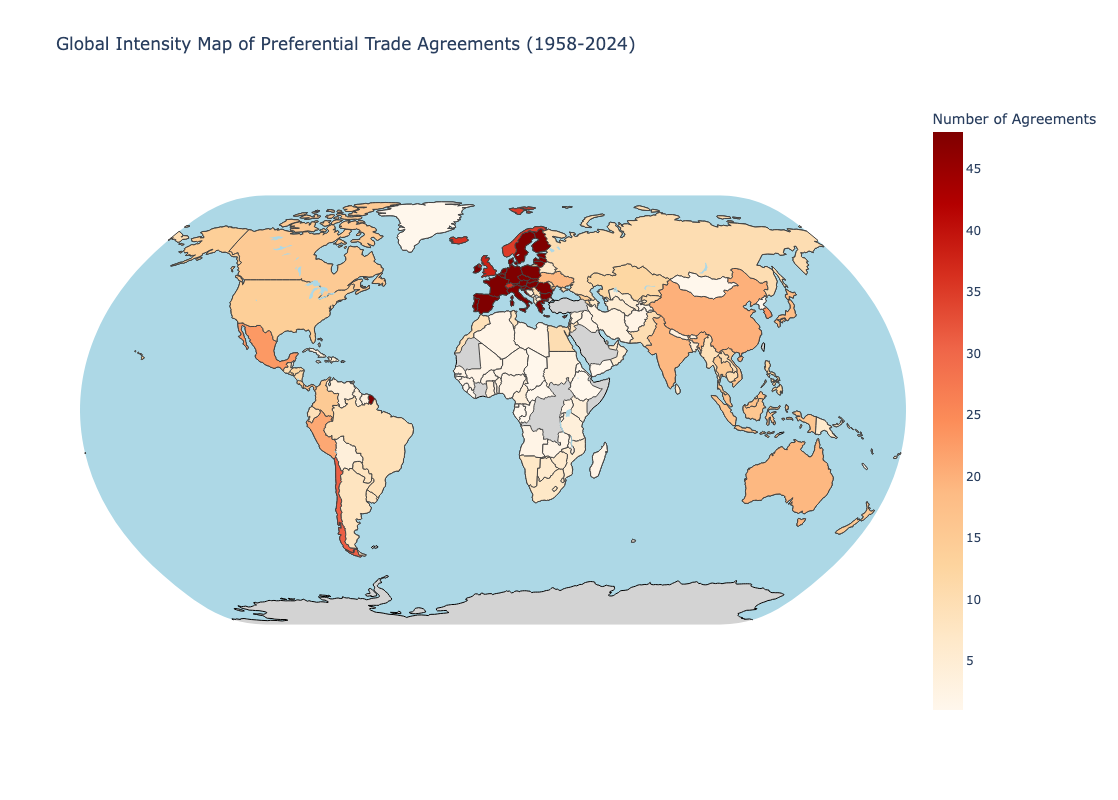

In [41]:
# Step 1: Create a dictionary to count the number of agreements per country
country_agreement_count = {}

# Iterate over the Signatories column and count occurrences
for signatories in trade_agreements['Signatories']:
    countries = signatories.split(';')  
    for country in countries:
        country = country.strip()  # Remove any extra spaces
        if country:  # Ensure the country is not empty
            if country not in country_agreement_count:
                country_agreement_count[country] = 0
            country_agreement_count[country] += 1

# Convert the country counts into a DataFrame
country_counts = pd.DataFrame(list(country_agreement_count.items()), columns=['country', 'num_agreements'])

# Step 2: Map country names to ISO Alpha-3 codes
def get_iso_alpha3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

country_counts['iso_alpha3'] = country_counts['country'].apply(get_iso_alpha3)

# Step 3: Drop countries that failed to map to ISO codes (if any)
country_counts = country_counts.dropna(subset=['iso_alpha3'])

# Step 4: Create the map with Plotly
fig = px.choropleth(
    country_counts,
    locations='iso_alpha3',
    color='num_agreements',
    hover_name='country',
    color_continuous_scale='OrRd',
    title='Global Intensity Map of Preferential Trade Agreements (1958-2024)',
    width=1200,
    height=800
)

# Step 5: Force land borders and other map settings
fig.update_geos(
    showcoastlines=True, coastlinecolor="Black",
    showland=True, landcolor="lightgrey",
    showocean=True, oceancolor="lightblue",
    showlakes=True, lakecolor="lightblue",
    showframe=False,
    projection_type='natural earth'
)

fig.update_layout(coloraxis_colorbar=dict(title='Number of Agreements'))

# Show the map
fig.show()

### **PREFERENTIAL TRADE AGREEMENTS OVER TIME (1958-2024)**

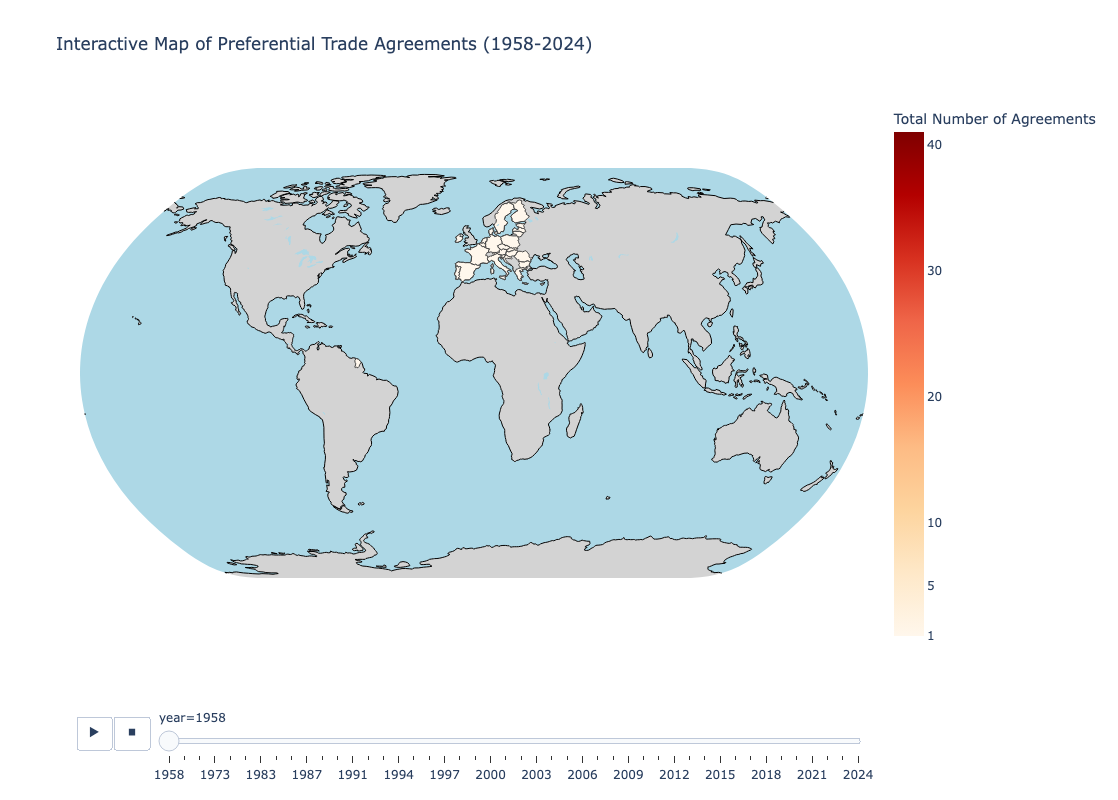

In [43]:
# Step 1: Sort the original DataFrame by date
trade_agreements['Date of entry into force'] = pd.to_datetime(
    trade_agreements['Date of entry into force'], errors='coerce'
)
trade_agreements = trade_agreements.dropna(subset=['Date of entry into force'])
trade_agreements = trade_agreements.sort_values(by='Date of entry into force', ascending=True)

# Step 2: Extract countries and dates into agreements_df
data = []
for _, row in trade_agreements.iterrows():
    signatories = row['Signatories']
    entry_date = row['Date of entry into force']
    countries = [c.strip() for c in signatories.split(';') if c.strip()]
    for country in countries:
        data.append({'country': country, 'Date of entry into force': entry_date})

agreements_df = pd.DataFrame(data)

# Step 3: Sort agreements_df by date
agreements_df['Date of entry into force'] = pd.to_datetime(
    agreements_df['Date of entry into force'], errors='coerce'
)
agreements_df = agreements_df.dropna(subset=['Date of entry into force'])
agreements_df = agreements_df.sort_values(by='Date of entry into force', ascending=True)

# Extract the year
agreements_df['year'] = agreements_df['Date of entry into force'].dt.year

# Step 4: Group by country and year, counting the agreements
annual_counts = agreements_df.groupby(['country', 'year']).size().reset_index(name='num_agreements')

# Step 5: Create a new column showing the cumulative total agreements up to and including each year
# Calculate the total agreements for each country up to and including each year
annual_counts['total_agreements_up_to_year'] = annual_counts.groupby('country')['num_agreements'].transform('cumsum')

# Step 6: Map country names to ISO Alpha-3 codes
def get_iso_alpha3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

annual_counts['iso_alpha3'] = annual_counts['country'].apply(get_iso_alpha3)
annual_counts = annual_counts.dropna(subset=['iso_alpha3'])
annual_counts['year'] = annual_counts['year'].astype(int)

# Step 7: Ensure the 'year' column is sorted in ascending order
annual_counts = annual_counts.sort_values(by='year', ascending=True)

# Step 8: Create the animated map
fig = px.choropleth(
    annual_counts,
    locations='iso_alpha3',
    color='total_agreements_up_to_year',
    hover_name='country',
    animation_frame='year',
    color_continuous_scale='OrRd',
    title='Interactive Map of Preferential Trade Agreements (1958-2024)',
    width=1200,
    height=800
)

# Customize map settings
fig.update_geos(
    showcoastlines=True, coastlinecolor="Black",
    showland=True, landcolor="lightgrey",
    showocean=True, oceancolor="lightblue",
    showlakes=True, lakecolor="lightblue",
    showframe=False,
    projection_type='natural earth'
)

# Adjust the color scale to start from 1 and show more granular data for low values
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Total Number of Agreements',
        tickvals=[1, 5, 10, 20, 30, 40],  # Customize ticks
        ticktext=['1', '5', '10', '20', '30', '40'] 
    ),
    coloraxis=dict(
        cmin=1,  # Set minimum color scale to 1
        cmax=annual_counts['total_agreements_up_to_year'].max()  # Max value from the data
    )
)

# Step 9: Display the map
fig.show()

## **SECTION 5: WHAT DO REMITTANCE FLOWS SAY ABOUT LABOR AGREEMENTS AND MIGRATION?**

***This section indicates that labor agreements affect labor migration to a limited degree. While countries like Germany that have signed lots of labor agreements in the past feature in the top sources of remittances, the US and UK still dominate global remittance flows. On the other hand, however, the emergence of gulf countries like UAE and Saudi Arabia have also entered the top 5, athough this meteoric rise is not fully captured in the labor agreements trends.*** 

#### **STEP 1: DATA CLEANING AND REARRANGEMENT**

In [45]:
#Data cleaning
bil_remittance.rename(columns={bil_remittance.columns[0]: 'Sender'}, inplace=True)
# Reshape the DataFrame into long format
remittance_data = bil_remittance.melt(
    id_vars=['Sender'],  # Treat 'Sender' as the identifier variable
    var_name='Receiver',  # New column for receiving countries
    value_name='Amount'   # New column for remittance amounts
)

# Convert the remittance amounts to numeric, handling invalid data
remittance_data['Amount'] = pd.to_numeric(remittance_data['Amount'], errors='coerce')

# Fill missing values in the 'Amount' column with 0
remittance_data['Amount'] = remittance_data['Amount'].fillna(0)
remittance_data.tail()

Sender  Receiver  Amount
45791  Virgin Islands (U.S.)  Zimbabwe     0.0
45792     West Bank and Gaza  Zimbabwe     0.0
45793            Yemen, Rep.  Zimbabwe     0.0
45794                 Zambia  Zimbabwe    17.0
45795               Zimbabwe  Zimbabwe     0.0

### **STEP 2: MAPPING THE REMITTANCE FLOWS**

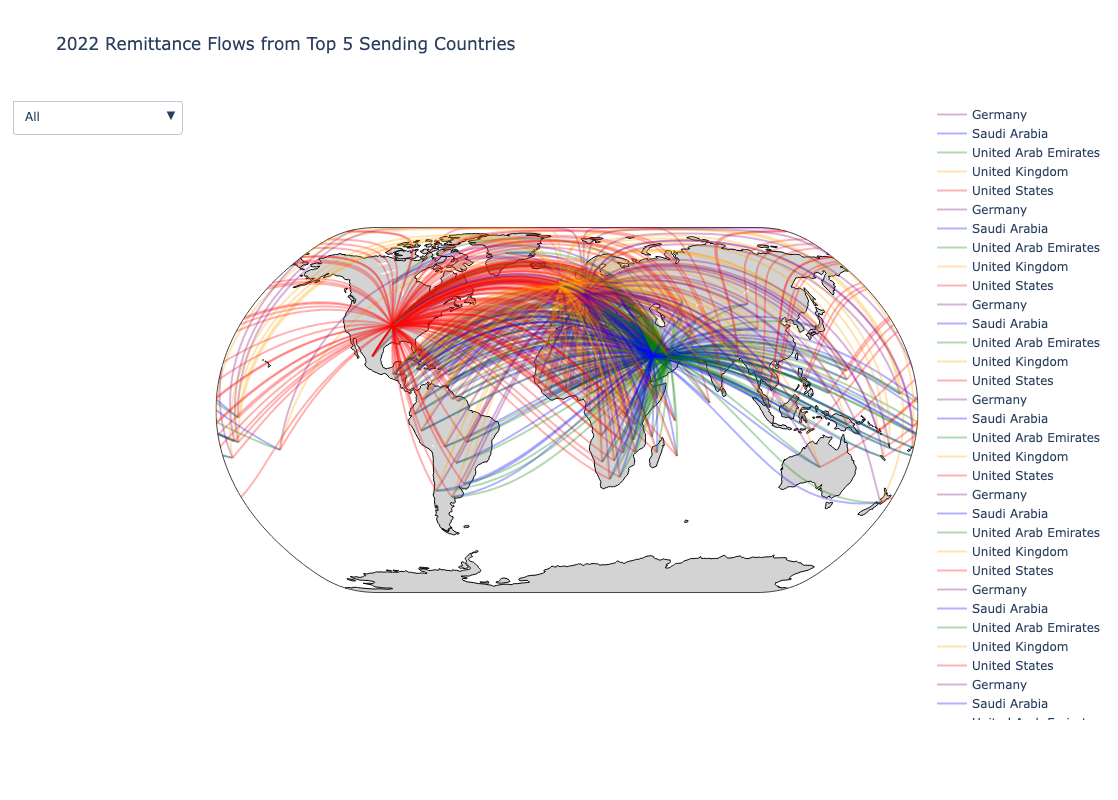

In [47]:
# Rename columns in a non-destructive manner for Sender merge
sender_coordinates = country_coordinates.rename(columns={
    'country': 'Sender',
    'latitude': 'Sender_lat',
    'longitude': 'Sender_lon'
})

# Merge sender coordinates
remittance_data = remittance_data.merge(
    sender_coordinates,
    on='Sender',
    how='left'
)

# Rename columns in a non-destructive manner for Receiver merge
receiver_coordinates = country_coordinates.rename(columns={
    'country': 'Receiver',
    'latitude': 'Receiver_lat',
    'longitude': 'Receiver_lon'
})

# Merge receiver coordinates
remittance_data = remittance_data.merge(
    receiver_coordinates,
    on='Receiver',
    how='left'
)

# Filter top 5 sending countries
top_senders = (
    remittance_data.groupby('Sender')['Amount']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter data for top senders
top_senders_data = remittance_data[remittance_data['Sender'].isin(top_senders)].copy()

# Assign unique colors to each sender
colors = ['red', 'blue', 'green', 'purple', 'orange']
color_map = {sender: color for sender, color in zip(top_senders, colors)}

top_senders_data['Arrow_color'] = top_senders_data['Sender'].map(color_map)

# Calculate total remittance amounts for top senders
total_remittances = top_senders_data.groupby('Sender')['Amount'].sum().to_dict()

# Plot the map
fig = go.Figure()

# Add arrows for remittance flows
for _, row in top_senders_data.iterrows():
    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=[row['Sender_lon'], row['Receiver_lon']],
        lat=[row['Sender_lat'], row['Receiver_lat']],
        mode='lines',
        line=dict(
            width=2,
            color=row['Arrow_color']
        ),
        opacity=max(0.3, min(1, row['Amount'] / top_senders_data['Amount'].max())),
        name=row['Sender']
    ))

# Add filter for viewing specific senders
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label='All',
                    method='update',
                    args=[
                        {'visible': [True] * len(fig.data)},
                        {'title': '2022 Remittance Flows from Top 5 Sending Countries'}
                    ]
                ),
            ] + [
                dict(
                    label=sender,
                    method='update',
                    args=[
                        {'visible': [trace.name == sender for trace in fig.data]},
                        {'title': f"Remittance Flows from {sender}: {total_remittances[sender]:,.2f} Million US$"}
                    ]
                )
                for sender in top_senders
            ],
            direction='down',
            showactive=True
        )
    ],
    title_text='2022 Remittance Flows from Top 5 Sending Countries',
    showlegend=True,
    width=1200,
    height=800,
    geo=dict(
        scope='world',
        projection_type='natural earth',
        showland=True,
        landcolor="lightgrey",
        countrycolor="white",
        coastlinecolor="black"
    )
)

fig.show()


## **SECTION 6: CONCLUSION**

***Michael Clemens (2011) argued that barriers to the movement of labor were the biggest hindrances to the global economy and that their removals could increase Global GDP by 50-150%. This analysis supports this notion in that labor agreements and remittance flows are more spread across the world than preferential trade agreements that tend to be more localized. However, this analysis also showed that remittance flows (a proxy for labor migration) do not necessarily depend on labor migration.***

**Possible next steps**: *comparing the above labor and remittance flows with the evolution of trade flows and how they have responded to eaach other over time*